In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [78]:
#read data
cell_df=pd.read_csv('TEST.csv')
cell_df.shape
cell_df.size
cell_df.count()
cell_df


,P_Duration,P_Amp,QRS_Duration,QRS_Amp,RR_Interval,PR_Interval,Etat
0,130,0.145,160.0,1.119,728,25,1
1,127,0.178,166.0,1.782,724,26,1
2,137,0.134,161.0,1.888,745,20,1
3,133,0.145,160.0,1.836,739,30,1
4,134,0.163,157.0,1.894,731,29,1
...,...,...,...,...,...,...,...
335,86,0.085,107.0,0.950,825,35,-1
336,77,0.063,120.0,1.560,700,58,-1
337,95,0.084,90.0,1.500,854,53,-1
338,93,0.079,106.0,1.200,871,47,-1


<AxesSubplot:xlabel='RR_Interval', ylabel='P_Amp'>

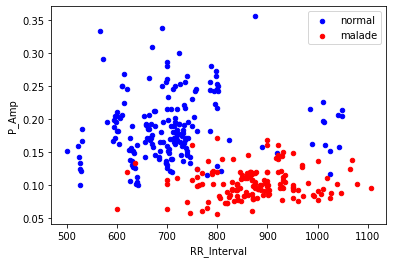

In [81]:
# view data
normal_df=cell_df[cell_df['Etat']==1][0:]
malade_df=cell_df[cell_df['Etat']==-1][0:]

axes=normal_df.plot(kind='scatter',x='RR_Interval',y='P_Amp',color='blue',label='normal')
malade_df.plot(kind='scatter',x='RR_Interval',y='P_Amp',color='red',label='malade',ax=axes)

In [82]:
cell_df.columns

feature_df = cell_df[['P_Duration','P_Amp','QRS_Duration','QRS_Amp','RR_Interval','PR_Interval']]

#Independent var
x = np.asarray(feature_df)
x.shape

#Dependent var
y = np.asarray(cell_df['Etat'])
y.shape

x[0:5]

array([[1.300e+02, 1.450e-01, 1.600e+02, 1.119e+00, 7.280e+02, 2.500e+01],
       [1.270e+02, 1.780e-01, 1.660e+02, 1.782e+00, 7.240e+02, 2.600e+01],
       [1.370e+02, 1.340e-01, 1.610e+02, 1.888e+00, 7.450e+02, 2.000e+01],
       [1.330e+02, 1.450e-01, 1.600e+02, 1.836e+00, 7.390e+02, 3.000e+01],
       [1.340e+02, 1.630e-01, 1.570e+02, 1.894e+00, 7.310e+02, 2.900e+01]])

In [83]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x_train.shape


(272, 6)

In [84]:
y_train.shape

(272,)

In [85]:
x_test.shape
y_test.shape

(68,)

In [86]:
#use simple Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)


In [87]:
clf.fit(x_train,y_train) #train

DecisionTreeClassifier(max_depth=5)

In [88]:
clf.score(x_test,y_test) # make predection

0.9558823529411765

In [89]:
y_predict = clf.predict(x_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.96      0.93      0.95        28
           1       0.95      0.97      0.96        40

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.95        68
weighted avg       0.96      0.96      0.96        68



In [91]:
# matrice de confision
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_predict)

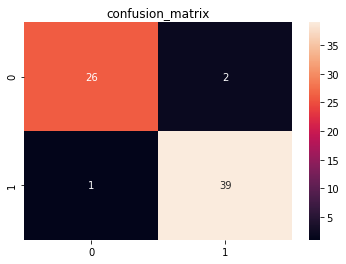

In [92]:
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [93]:
#use Random Forest Classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train) #train
rf_clf.score(x_test,y_test) # make predection

0.9852941176470589

In [94]:
y_predict = rf_clf.predict(x_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        40

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [96]:
# matrice de confision
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict)
confusion_matrix(y_test,y_predict)

array([[28,  0],
       [ 1, 39]], dtype=int64)

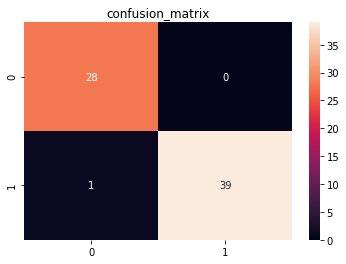

In [97]:
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [98]:
# use Gradient Boosting
gb_clf= ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(x_train,y_train) #train
gb_clf.score(x_test,y_test) # make predection

0.9705882352941176

In [99]:
y_predict = gb_clf.predict(x_test)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        40

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [101]:
# matrice de confision
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(y_test,y_predict)

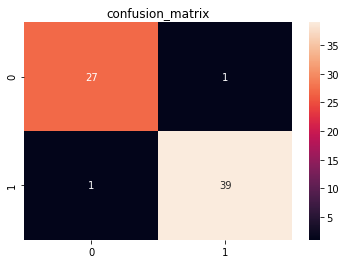

In [102]:
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [103]:
# use Logistique Regression

In [104]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.06643048  1.33425232  0.00387036  3.70235067 -0.01421197 -0.07592139]]
[1.45329209]


In [106]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [107]:
log_reg.score(x_test,y_test) # make predection

0.9558823529411765

In [108]:
# Show the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.97      0.95      0.96        40

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68



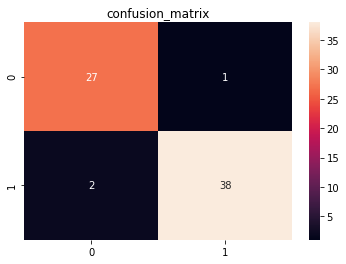

In [110]:
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [111]:
# use Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB()

In [112]:
nbm.fit(x_train, y_train)

GaussianNB()

In [113]:
nbm.score(x_test, y_test)

0.9852941176470589

In [114]:
y_pred = nbm.predict(x_test)

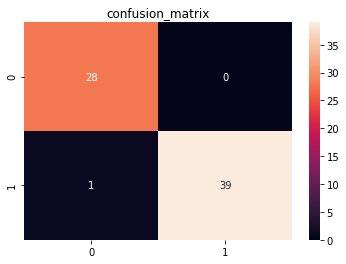

In [115]:
# Show the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        40

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [117]:
# use K-Nearset Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_kn = KNeighborsClassifier(n_neighbors=3)
clf_kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
clf_kn.score(x_test,y_test)

0.9852941176470589

In [119]:
y_pred = clf_kn.predict(x_test)

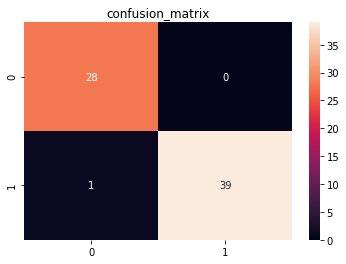

In [120]:
# Show the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        40

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [122]:
# use SVM
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train , y_train)
y_predict = classifier.predict(x_test)

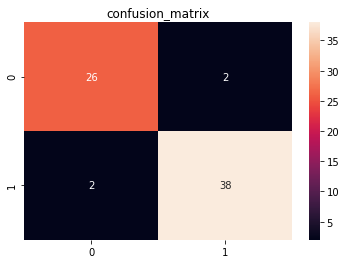

In [125]:
# Show the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predict)
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [126]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93        28
           1       0.95      0.95      0.95        40

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

